# Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
import seaborn as sns

In [13]:
from sklearn.model_selection import GridSearchCV

In [3]:
alldata = pd.read_csv('/home/wangmk/UM/Research/SURE/cleaned_data/full_cleaned_data.csv')
alldata['Agree'] = ~(alldata['True_state']^alldata['Alert'])

In [4]:
alldata.head()

,Trial,True_state,Alert,Identification,First_toggle_time,RMS,Attention,Click,Top_Left_Enemy,Top_Right_Enemy,Bottom_Left_Enemy,Bottom_Right_Enemy,Top_Left_Dark,Top_Right_Dark,Bottom_Left_Dark,Bottom_Right_Dark,Agree
0,0,True,True,True,4179,65.244487,0.914573,2,True,False,False,False,False,True,True,True,True
1,1,False,False,False,3653,67.293907,0.895000,2,False,False,False,False,True,True,True,True,True
2,2,False,True,False,2186,100.119892,0.854271,2,False,False,False,False,True,False,True,False,False
3,3,False,False,False,3412,33.403009,0.889447,2,False,False,False,False,True,False,True,True,True
4,4,False,False,False,4514,70.063858,0.929648,2,False,False,False,False,True,True,True,True,True


In [5]:
abnormal = alldata[alldata['RMS']>60]
normal = alldata[alldata['RMS']<=60]

In [6]:
newdata = abnormal.append(normal.sample(n=160,random_state=50))
newdata['performance'] = newdata['RMS'] <= 60

In [7]:
newdata['First_toggle_time'] = newdata['First_toggle_time']/1000

In [8]:
newdata['Trial'] = newdata['Trial']/100

In [9]:
X = newdata.drop(['RMS','performance','Click'],axis=1)
y = newdata['performance']

In [25]:
svm = SVC(probability=True)

In [26]:
parameters = {'gamma':[0.00001,0.0001,0.001,0.01,0.1,1],'C':[0.1,1,10]}

In [27]:
searcher = GridSearchCV(svm,parameters)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=30,stratify=y)

In [29]:
searcher.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
searcher.best_params_

{'C': 10, 'gamma': 0.01}

In [31]:
y_pred = searcher.predict(X_test)

In [32]:
searcher.score(X_test,y_test)

0.625

In [35]:
y_pred_prob = searcher.predict_proba(X_test)[:,1]

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Text(0.5,1,'ROC Curve')

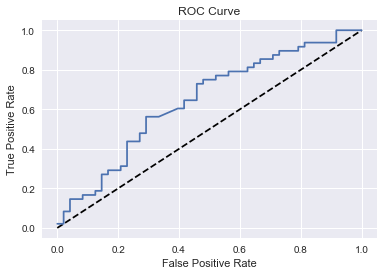

In [41]:
sns.set()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
